# Implementation of Mini-AES for 2 Rounds on Qiskit

## Import Libraries

In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import *
from qiskit.circuit.library import *
from qiskit.visualization import circuit_drawer, plot_histogram
from qiskit import *
from qiskit.circuit.library import *
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
from math import pi

## Defining Functions for Encoding

In [2]:
def Plain_text(qc, P):
    for i in range(len(P)):
        if int(P[i]) == 1:
            qc.x(i)
    return qc
def Key_addition(qc, K):
    for i in range(len(K)):
        if int(K[i]) == 1:
            qc.x(i)
    return qc

def textToqubit(qc, start, end, K1):
    for i in range(start,end):
        if int(K1[i-start]) == 1:
            qc.x(i)
    return qc

def mark(qc, m):
    for qubit in range(len(m)):
        if m[qubit] == '0':
            qc.x(qubit)


## Defining Plain-Text, Keys and QuantumCircuit

In [3]:
qc = QuantumCircuit(28,16) # 28,16
P = ['1001', '1100', '0110', '0011'] 
K = ['1100', '0011', '1111', '0000']
k = ['0011000011111111', '0110011010010110']

# Round 1

## Sbox

In [4]:
s=8
for i in range(4):
    qc.h([0,1,2,3])
    qc.barrier()
    Key_addition(qc, K[i])
    qc.barrier()
    #######################################
    qc.ccx(0,1,4)
    qc.ccx(2,4,5)
    qc.cx(4,5)
    qc.reset(4)
    qc.ccx(1,2,4)
    qc.ccx(3,4,5)
    qc.cx(4,5)
    qc.cx([0,1,3],[5,5,5])
    qc.x(5)
    ########################################
    #qc.measure(5,3)
    qc.cx(5,s)
    qc.barrier()
    qc.reset([4,5])
    ##########################################
    qc.ccx(0,2,4)
    qc.ccx(3,4,5)
    qc.ccx(1,3,5)
    qc.ccx(2,3,5)
    qc.cx([0,1,4],[5,5,5])
    qc.x(5)
    ###########################################
    #qc.measure(5,2)
    qc.cx(5,s+1)
    qc.barrier()
    qc.reset([4,5])
    ###########################################
    qc.ccx(0,1,4)
    qc.ccx(2,4,5)
    qc.ccx(3,4,5)
    qc.ccx(0,1,5)
    qc.ccx(0,2,5)
    qc.ccx(0,3,5)
    qc.ccx(1,2,5)
    qc.ccx(1,3,5)
    qc.ccx(2,3,5)
    qc.cx([3,2],[5,5])
    qc.x(5)
    ###########################################
    #qc.measure(5,1)
    qc.cx(5,s+2)
    qc.barrier()
    qc.reset([4,5])
    ###########################################
    qc.ccx(0,3,4)
    qc.ccx(2,4,5)
    qc.ccx(1,3,5)
    qc.cx([2,0,4],[5,5,5])
    ##########################################
    #qc.measure(5,0)
    qc.cx(5,s+3)
    qc.barrier()
    qc.reset(list(range(0,6)))
    s= s+4


## Row Shift

In [5]:
#Applying Row Shift 
qc.swap(12,20)
qc.swap(13,21)
qc.swap(14,22)
qc.swap(15,23)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=28, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(28, 'q'), 0), Qubit(QuantumRegister(28, 'q'), 1), Qubit(QuantumRegister(28, 'q'), 2), Qubit(QuantumRegister(28, 'q'), 3), Qubit(QuantumRegister(28, 'q'), 4), Qubit(QuantumRegister(28, 'q'), 5), Qubit(QuantumRegister(28, 'q'), 6), Qubit(QuantumRegister(28, 'q'), 7), Qubit(QuantumRegister(28, 'q'), 8), Qubit(QuantumRegister(28, 'q'), 9), Qubit(QuantumRegister(28, 'q'), 10), Qubit(QuantumRegister(28, 'q'), 11), Qubit(QuantumRegister(28, 'q'), 12), Qubit(QuantumRegister(28, 'q'), 13), Qubit(QuantumRegister(28, 'q'), 14), Qubit(QuantumRegister(28, 'q'), 15), Qubit(QuantumRegister(28, 'q'), 16), Qubit(QuantumRegister(28, 'q'), 17), Qubit(QuantumRegister(28, 'q'), 18), Qubit(QuantumRegister(28, 'q'), 19), Qubit(QuantumRegister(28, 'q'), 20), Qubit(QuantumRegister(28, 'q'), 21), Qubit(QuantumRegister(28, 'q'), 22), Qubit(QuantumRegister(28, 'q'), 23), Qubit(QuantumReg

## Mix Column

In [6]:
#copy f and 1 to 0-3, 4-7
qc.cx([8,9,10,11],[0,1,2,3])
qc.cx([12,13,14,15],[4,5,6,7])
qc.barrier()
qc.reset([12,13,14,15])
qc.barrier()
#copy 7 to 12-15
qc.cx([20,21,22,23],[12,13,14,15])
qc.barrier()
#qc.measure([0,1,2,3,4,5,6,7,8,9,10,11],[11,10,9,8,7,6,5,4,3,2,1,0)
#qc.measure(list(range(12,24)),[11,10,9,8,7,6,5,4,3,2,1,0)
############################################
##3(f)
qc.cx(0,3)
qc.cx(1,0)
qc.cx(2,1)
qc.cx(3,2)
##2(1)
qc.swap(4,7)
qc.swap(5,4)
qc.swap(5,6)
qc.cx(7,6)
##XOR  (3(f)+2(1))
qc.cx(4,0)
qc.cx(5,1)
qc.cx(6,2)
qc.cx(7,3)
##inverse 2(1)
qc.cx(7,6)
qc.swap(5,6)
qc.swap(5,4)
qc.swap(4,7)
########################################
##3(7)
qc.cx(12,15)
qc.cx(13,12)
qc.cx(14,13)
qc.cx(15,14)
##2(a)
qc.swap(16,19)
qc.swap(17,16)
qc.swap(17,18)
qc.cx(19,18)
##XOR (2(a) + 3(7))
qc.cx(16,12)
qc.cx(17,13)
qc.cx(18,14)
qc.cx(19,15)
## inverse 2(a)
##2(a)
qc.cx(19,18)
qc.swap(17,18)
qc.swap(17,16)
qc.swap(16,19)
########################################
qc.barrier()
########################################
## 3 on inverse 2(1) ---> 3(1)
qc.cx(4,7)
qc.cx(5,4)
qc.cx(6,5)
qc.cx(7,6)
## 3 on inverse 2(a) --> 2(a)
qc.cx(16,19)
qc.cx(17,16)
qc.cx(18,17)
qc.cx(19,18)
######################################
# 2f
qc.swap(8,11)
qc.swap(8,9)
qc.swap(9,10)
qc.cx(11,10)
# 2(7)
qc.swap(20,23)
qc.swap(20,21)
qc.swap(21,22)
qc.cx(23,22)
qc.barrier()
#####################################
#XOR (2(f)+3(1))
qc.cx([8,9,10,11],[4,5,6,7])
#XOR (3(a)+2(7))
qc.cx([20,21,22,23],[16,17,18,19])
qc.barrier()
#####################################
qc.reset([8,9,10,11])
qc.cx([16,17,18,19],[8,9,10,11])


## Key addition for K1

In [7]:
qc.barrier()
Key_addition(qc, k[0])
qc.reset(list(range(16,28)))

In [8]:
# #check
# ####################################
# qc.measure(list(range(16)),[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0)
# ###################################

## Reallocation for Easiness

In [9]:
## copy  except 1st to below 12
qc.cx([4,5,6,7, 8,9,10,11, 12,13,14,15],[16,17,18,19, 20,21,22,23,  24,25,26,27])
qc.barrier()
qc.reset([4,5,6,7, 8,9,10,11, 12,13,14,15])

## Sbox on 2nd Round

In [10]:
s=6
l=16
for i in range(4):
    qc.barrier()
    #######################################
    qc.ccx(0,1,4)
    qc.ccx(2,4,5)
    qc.cx(4,5)
    qc.reset(4)
    qc.ccx(1,2,4)
    qc.ccx(3,4,5)
    qc.cx(4,5)
    qc.cx([0,1,3],[5,5,5])
    qc.x(5)
    ########################################
    qc.cx(5,s)
    qc.barrier()
    qc.reset([4,5])
    ##########################################
    qc.ccx(0,2,4)
    qc.ccx(3,4,5)
    qc.ccx(1,3,5)
    qc.ccx(2,3,5)
    qc.cx([0,1,4],[5,5,5])
    qc.x(5)
    ###########################################
    qc.cx(5,s+1)
    qc.barrier()
    qc.reset([4,5])
    ###########################################
    qc.ccx(0,1,4)
    qc.ccx(2,4,5)
    qc.ccx(3,4,5)
    qc.ccx(0,1,5)
    qc.ccx(0,2,5)
    qc.ccx(0,3,5)
    qc.ccx(1,2,5)
    qc.ccx(1,3,5)
    qc.ccx(2,3,5)
    qc.cx([3,2],[5,5])
    qc.x(5)
    ###########################################
    qc.cx(5,s+2)
    qc.barrier()
    qc.reset([4,5])
    ###########################################
    qc.ccx(0,3,4)
    qc.ccx(2,4,5)
    qc.ccx(1,3,5)
    qc.cx([2,0,4],[5,5,5])
    ##########################################
    qc.cx(5,s+3)
    qc.barrier()
    qc.reset(list(range(0,8)))
    s= s+4
    ################# 
    if (i==0):
        #copy 2nd state
        qc.cx([16,17,18,19],[0,1,2,3])
        qc.reset([16,17,18,19])
    if (i==1):
        #copy 3rd state
        qc.cx([20,21,22,23],[0,1,2,3])
        qc.reset([20,21,22,23])
    if (i==2):
        #copy 4th state
        qc.cx([24,25,26,27],[0,1,2,3])
        qc.reset([24,25,26,27])


## Row Shift

In [11]:
#RowShift
qc.swap([10,11,12,13],[18,19,20,21])

## Key Addition for K2

In [12]:
textToqubit(qc, 6, 21, k[1])

## Oracle

In [13]:
b = [6, 10, 14, 18]
m= '0100111110101111' 
qc.h([6,7,8,9, 10,11,12,13, 14,15,16,17, 18,19,20,21])
mark(qc, m)
for i in range(4):
    #############################
    qc.cp(pi/4, b[i], b[i]+3)
    qc.cx(b[i], b[i]+1)
    qc.cp(-pi/4, b[i]+1, b[i]+3)
    qc.cx(b[i], b[i]+1)
    qc.cp(pi/4, b[i]+1, b[i]+3)
    qc.cx(b[i]+1, b[i]+2)
    qc.cp(-pi/4, b[i]+2, b[i]+3)
    qc.cx(b[i], b[i]+2)
    qc.cp(pi/4, b[i]+2, b[i]+3)
    qc.cx(b[i]+1,b[i]+2)
    qc.cp(-pi/4, b[i]+2, b[i]+3)
    qc.cx(b[i], b[i]+2)
    qc.cp(pi/4, b[i]+2, b[i]+3)
    ############################

mark(qc, m)
    
    ########################################
    ######### Amplification ################
    ########################################
for i in range(4):
    qc.h(b[i])
    qc.h(b[i]+1)
    qc.h(b[i]+2)
    qc.h(b[i]+3)
    qc.x(b[i])
    qc.x(b[i]+1)
    qc.x(b[i]+2)
    qc.x(b[i]+3)
    
    qc.cp(pi/4, b[i], b[i]+3)
    qc.cx(b[i], b[i]+1)
    qc.cp(-pi/4, b[i]+1, b[i]+3)
    qc.cx(b[i], b[i]+1)
    qc.cp(pi/4, b[i]+1, b[i]+3)
    qc.cx(b[i]+1, b[i]+2)
    qc.cp(-pi/4, b[i]+2, b[i]+3)
    qc.cx(b[i], b[i]+2)
    qc.cp(pi/4, b[i]+2, b[i]+3)
    qc.cx(b[i]+1, b[i]+2)
    
    qc.cp(-pi/4, b[i]+2, b[i]+3)
    qc.cx(b[i], b[i]+2)
    qc.cp(pi/4, b[i]+2, b[i]+3)
    
    qc.x(b[i])
    qc.x(b[i]+1)
    qc.x(b[i]+2)
    qc.x(b[i]+3)
    qc.h(b[i])
    qc.h(b[i]+1)
    qc.h(b[i]+2)
    qc.h(b[i]+3)
################################################

## Measurement

In [14]:
qc.measure([6,7,8,9, 10,11,12,13, 14,15,16,17, 18,19,20,21], [15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0])


## Graphical Output

In [15]:
qc.draw(output='mpl', fold=99999)#.savefig('The_Mini_Sbox2')

## Simulation

In [ ]:
simulator = AerSimulator(method='automatic', precision='single', device='GPU')
job = simulator.run(qc, shots=60000)
result = job.result()
counts = result.get_counts(qc)
print(counts) #verified  0111001011000110  

In [ ]:
plot_histogram(counts)

## System Resource Used 
### Without GPU

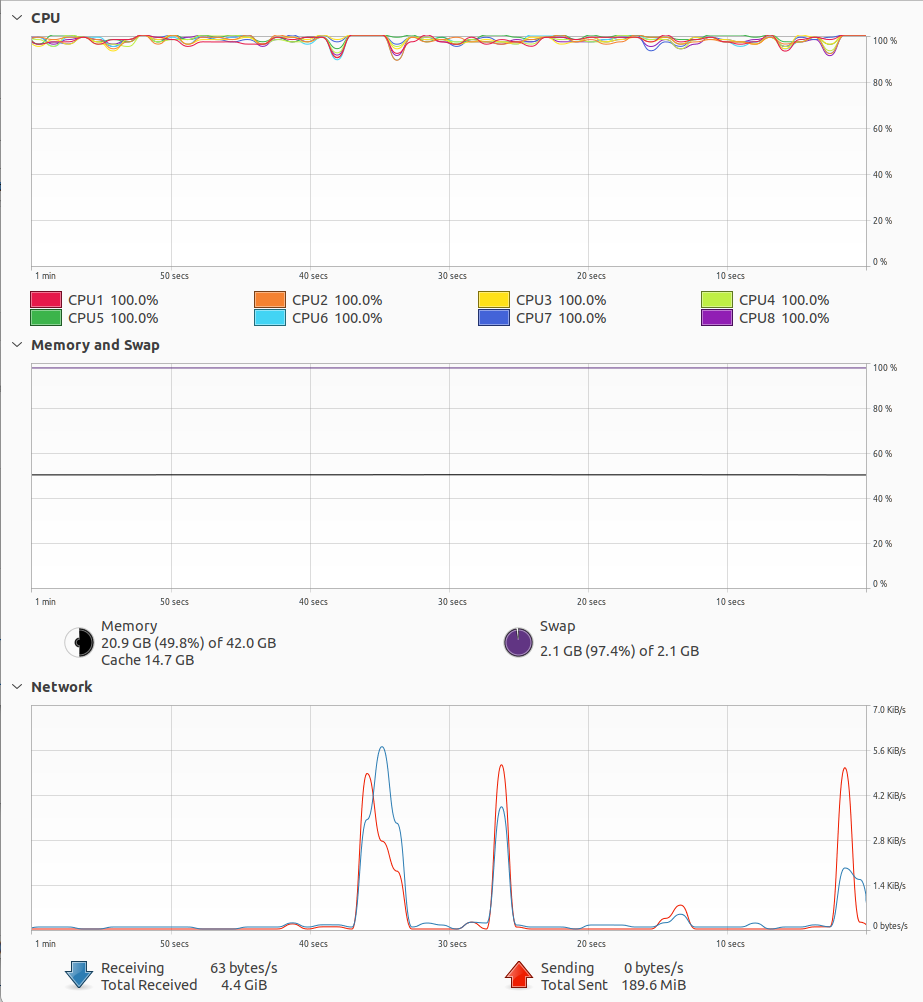

### With GPU

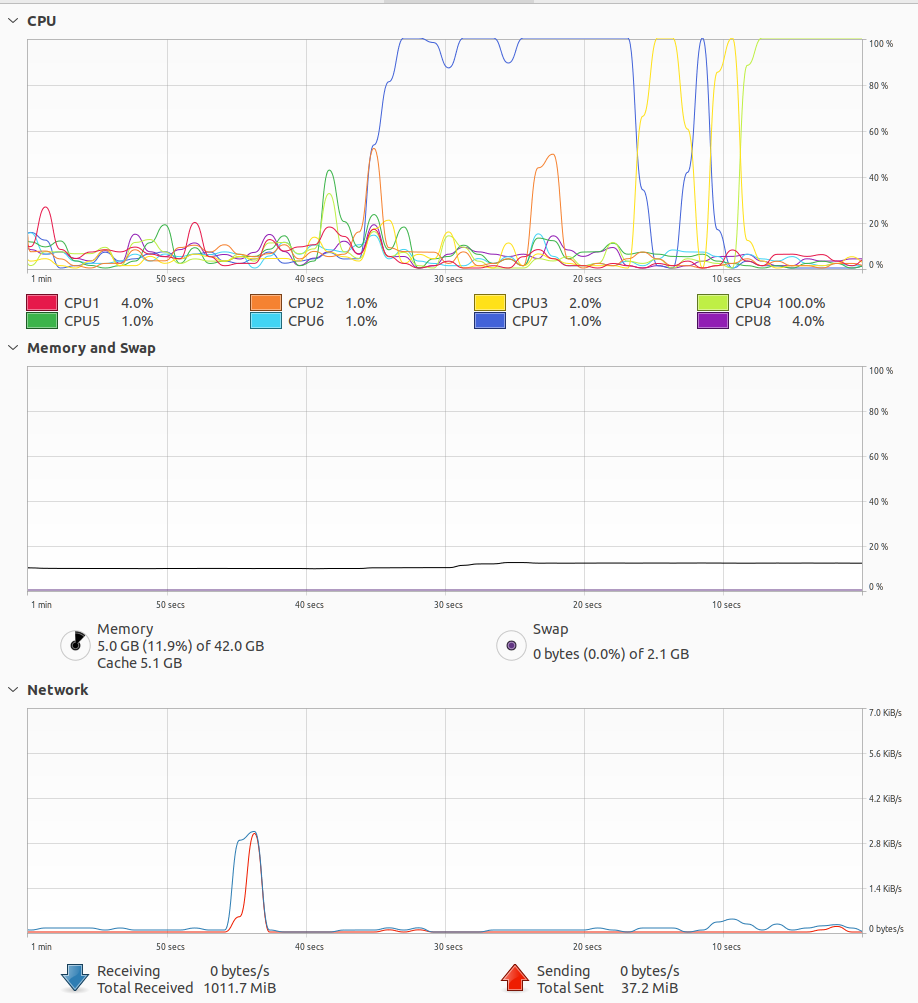